1) IMPORT LIBRARIES

In [ ]:
!python -m spacy download el_core_news_sm 

     |████████████████████████████████| 11.4MB 27.2MB/s 
  Created wheel for el-core-news-sm: filename=el_core_news_sm-2.2.5-cp37-none-any.whl size=11422785 sha256=6ad50031f72f090eeae25832b19deee534c8a807e2c83317d9522eb375b9682b
  Stored in directory: /tmp/pip-ephem-wheel-cache-0tb5zrmo/wheels/70/a1/c5/6690d6b524d87e287a8070cf957f834fb1b1665b9ede11348b
Successfully built el-core-news-sm
✔ Download and installation successful
You can now load the model via spacy.load('el_core_news_sm')


In [ ]:
! pip install dateparser         #Parse dates written using natural language into python

import spacy

import requests                            
from bs4 import BeautifulSoup as soup  

import pandas as pd
import matplotlib.pyplot as plt  
%matplotlib inline
plt.style.use('ggplot')
import numpy as np 
import glob 
import re    
from datetime import datetime
import dateparser
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image


     |████████████████████████████████| 286kB 26.1MB/s 


2) READ THE CSV FILE & DATA PRE-PROCESSING

In [ ]:
from google.colab import drive      
drive.mount('/content/gdrive')

        #reading the csv 
df = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/Scrape_skai.csv") #parse_dates=['Time'], date_parser= dateparser.parse)      

Mounted at /content/gdrive


In [ ]:
df

Title  ...                Time
0   Γεννηματά: Το αύριο μετά την πανδημία πρέπει ν...  ...  26/06/2021 - 22:34
1   Χατζηδάκης για εργασιακό νόμο: Μεγάλη μεταρρύθ...  ...  20/06/2021 - 17:00
2   Χατζηδάκης σε ΣΚΑΪ: Από την επόμενη εβδομάδα σ...  ...  17/06/2021 - 11:18
3                    Συνδικαλιστές υπεράνω του νόμου…  ...  17/06/2021 - 11:16
4   Εργασιακό-Χατζηδάκης: Περιμένουμε εξηγήσεις απ...  ...  16/06/2021 - 22:50
..                                                ...  ...                 ...
85  Δώρο Πάσχα 2021: Πότε καταβάλλεται -Πώς να το ...  ...  20/04/2021 - 07:59
86  Νέο εργασιακό νομοσχέδιο: Τι ισχύει για απολύσ...  ...  20/04/2021 - 07:14
87  Μητσοτάκης: Όχι πρόωρες εκτιμήσεις, σε συνεργα...  ...  14/04/2021 - 13:36
88  Επέκταση του επιδόματος 400 ευρώ σε περισσότερ...  ...  22/03/2021 - 15:49
89  Χατζηδάκης: Συνδρομή του ιδιωτικού τομέα για ε...  ...  21/03/2021 - 14:59

[90 rows x 3 columns]

In [ ]:
#converting 'Time' from str to datetime
df['Time'] = pd.to_datetime(df.Time , format='%d/%m/%Y - %H:%M')
df['Time']

0    2021-06-26 22:34:00
1    2021-06-20 17:00:00
2    2021-06-17 11:18:00
3    2021-06-17 11:16:00
4    2021-06-16 22:50:00
             ...        
85   2021-04-20 07:59:00
86   2021-04-20 07:14:00
87   2021-04-14 13:36:00
88   2021-03-22 15:49:00
89   2021-03-21 14:59:00
Name: Time, Length: 90, dtype: datetime64[ns]

In [ ]:
df['year'] = pd.DatetimeIndex(df['Time']).year
df['month'] = pd.DatetimeIndex(df['Time']).month
df['day'] = pd.DatetimeIndex(df['Time']).day
df

Title  ... day
0   Γεννηματά: Το αύριο μετά την πανδημία πρέπει ν...  ...  26
1   Χατζηδάκης για εργασιακό νόμο: Μεγάλη μεταρρύθ...  ...  20
2   Χατζηδάκης σε ΣΚΑΪ: Από την επόμενη εβδομάδα σ...  ...  17
3                    Συνδικαλιστές υπεράνω του νόμου…  ...  17
4   Εργασιακό-Χατζηδάκης: Περιμένουμε εξηγήσεις απ...  ...  16
..                                                ...  ...  ..
85  Δώρο Πάσχα 2021: Πότε καταβάλλεται -Πώς να το ...  ...  20
86  Νέο εργασιακό νομοσχέδιο: Τι ισχύει για απολύσ...  ...  20
87  Μητσοτάκης: Όχι πρόωρες εκτιμήσεις, σε συνεργα...  ...  14
88  Επέκταση του επιδόματος 400 ευρώ σε περισσότερ...  ...  22
89  Χατζηδάκης: Συνδρομή του ιδιωτικού τομέα για ε...  ...  21

[90 rows x 6 columns]

In [ ]:
#Set datetime as index
df.set_index('Time', inplace= True)
df

Title  ... day
Time                                                                    ...    
2021-06-26 22:34:00  Γεννηματά: Το αύριο μετά την πανδημία πρέπει ν...  ...  26
2021-06-20 17:00:00  Χατζηδάκης για εργασιακό νόμο: Μεγάλη μεταρρύθ...  ...  20
2021-06-17 11:18:00  Χατζηδάκης σε ΣΚΑΪ: Από την επόμενη εβδομάδα σ...  ...  17
2021-06-17 11:16:00                   Συνδικαλιστές υπεράνω του νόμου…  ...  17
2021-06-16 22:50:00  Εργασιακό-Χατζηδάκης: Περιμένουμε εξηγήσεις απ...  ...  16
...                                                                ...  ...  ..
2021-04-20 07:59:00  Δώρο Πάσχα 2021: Πότε καταβάλλεται -Πώς να το ...  ...  20
2021-04-20 07:14:00  Νέο εργασιακό νομοσχέδιο: Τι ισχύει για απολύσ...  ...  20
2021-04-14 13:36:00  Μητσοτάκης: Όχι πρόωρες εκτιμήσεις, σε συνεργα...  ...  14
2021-03-22 15:49:00  Επέκταση του επιδόματος 400 ευρώ σε περισσότερ...  ...  22
2021-03-21 14:59:00  Χατζηδάκης: Συνδρομή του ιδιωτικού τομέα για ε...  ...  21

[90 rows x 5 columns]

In [ ]:
df.dtypes

Title      object
Summary    object
year        int64
month       int64
day         int64
dtype: object

In [ ]:
#converting data type from object to string
df['Summary']= df['Summary'].astype(str)

In [ ]:
#converting data type from object to string
df['Title']= df['Title'].astype(str)

In [ ]:
#print the whole summary(need some cleaning)
pd.set_option("display.max_colwidth", -1)
print(df['Summary'])

Time
2021-06-26 22:34:00    «Η κυβέρνηση της Νέας Δημοκρατίας, στη μέση της θητείας της, έχει βάλει τη συντηρητική της σφραγίδα σε όλους τους τομείς της κοινωνικής και οικονομικής ζωής»,… 
2021-06-20 17:00:00    Μεγάλη μεταρρύθμιση που δίνει παραπάνω δύναμη στους εργαζόμενους και παραπάνω δύναμη στην οικονομία, χαρακτηρίζει ο υπουργός Εργασίας το νόμο για την Προστασία…
2021-06-17 11:18:00    Ήδη από την επόμενη εβδομάδα θα ισχύει η διάταξη του εργασιακού νόμου πως αν μια απεργία κριθεί παράνομη από δικαστήριο δεν μπορεί να επαναπροκηρυχθεί, όπως…   
2021-06-17 11:16:00    Του Βασίλη Χιώτη\r\n\r\nΜια φορά κι έναν καιρό, υπήρχε μια χώρα, στην οποία δεν γινόταν τίποτα, αν δεν το ήθελαν οι συνδικαλιστές!\r\n\r\nΓια να προσλάβει μια… 
2021-06-16 22:50:00    «Ο νόμος πλέον, για την προστασία της εργασίας είναι ένα μεγάλο βήμα μπροστά. Φέρνει την Ελλάδα πιο κοντά στις προηγμένες ευρωπαϊκές χώρες, καθώς ακολουθούμε…  
                                                                           

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


In [ ]:
#print the whole heading (need some cleaning)
pd.set_option("display.max_colwidth", -1)
print(df['Title'])

Time
2021-06-26 22:34:00    Γεννηματά: Το αύριο μετά την πανδημία πρέπει να είναι βιώσιμο αλλά και δίκαιο                   
2021-06-20 17:00:00    Χατζηδάκης για εργασιακό νόμο: Μεγάλη μεταρρύθμιση, ο ΣΥΡΙΖΑ καταψήφισε την κατοχύρωση του 8ωρου
2021-06-17 11:18:00    Χατζηδάκης σε ΣΚΑΪ: Από την επόμενη εβδομάδα σε ισχύ η διάταξη για τις παράνομες απεργίες       
2021-06-17 11:16:00    Συνδικαλιστές υπεράνω του νόμου…                                                                
2021-06-16 22:50:00    Εργασιακό-Χατζηδάκης: Περιμένουμε εξηγήσεις από ΣΥΡΙΖΑ για το ρεσιτάλ πολιτικής υποκρισίας      
                                                                  ...                                                  
2021-04-20 07:59:00    Δώρο Πάσχα 2021: Πότε καταβάλλεται -Πώς να το υπολογίσετε                                       
2021-04-20 07:14:00    Νέο εργασιακό νομοσχέδιο: Τι ισχύει για απολύσεις και αποζημιώσεις                              
2021-04-14 13:36:00    Μητσοτάκης: 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


In [ ]:
#Cleaning the text
def cleanTxt(text):
  text = re.sub(r'[^\w\s]', '', text)   #Removing puncuations
  text = text.lower()                     #Converting letters to lowercase
  text = text.replace('\xa0','')       #Removing \xa0 character(it means space)  
  text = text.replace('\t','')        #Removing \t character(similar to the indentation function in the document,Tab key) 
  text = text.replace('\n','')
  text = text.replace('\r','')                                                                                          
  text = re.sub('\d+', '', text)      #Removing numbers    
  text = text.lower()         
# Return the cleaned text
  return text
#Clean the tweets
df['Summary'] = df['Summary'].apply(cleanTxt)
df['Title'] =  df['Title'].apply(cleanTxt)
#Show the cleaned tweets
df.head(100)

Title  ... day
Time                                                                                                                ...    
2021-06-26 22:34:00  γεννηματά το αύριο μετά την πανδημία πρέπει να είναι βιώσιμο αλλά και δίκαιο                   ...  26
2021-06-20 17:00:00  χατζηδάκης για εργασιακό νόμο μεγάλη μεταρρύθμιση ο συριζα καταψήφισε την κατοχύρωση του ωρου  ...  20
2021-06-17 11:18:00  χατζηδάκης σε σκαϊ από την επόμενη εβδομάδα σε ισχύ η διάταξη για τις παράνομες απεργίες       ...  17
2021-06-17 11:16:00  συνδικαλιστές υπεράνω του νόμου                                                                ...  17
2021-06-16 22:50:00  εργασιακόχατζηδάκης περιμένουμε εξηγήσεις από συριζα για το ρεσιτάλ πολιτικής υποκρισίας       ...  16
...                                              ...                                                                ...  ..
2021-04-20 07:59:00  δώρο πάσχα  πότε καταβάλλεται πώς να το υπολογίσετε                                            ...  20
2021-04-20 07:14:00  νέο εργασιακό νομοσχέδιο τι ισχύει για απολύσεις και αποζημιώσεις                              ...  20
2021-04-14 13:36:00  μητσοτάκης όχι πρόωρες εκτιμήσεις σε συνεργασία με ειδικούς οι αποφάσεις για πάσχα             ...  14
2021-03-22 15:49:00  επέκταση του επιδόματος  ευρώ σε περισσότερους επιστήμονες                                     ...  22
2021-03-21 14:59:00  χατζηδάκης συνδρομή του ιδιωτικού τομέα για επιτάχυνση της καταβολής συντάξεων                 ...  21

[90 rows x 5 columns]

In [ ]:
#convert from int to string(month name)
df['month'] = pd.to_datetime(df['month'], format='%m').dt.month_name().str.slice(stop=3)

4) NATURAL LANGUAGE PROCESSING

In [ ]:
#Greek language
nlp = spacy.load('el_core_news_sm')

In [ ]:
#Greek stopwords are included in this list
list(nlp.Defaults.stop_words)[0:10]

['οποιαδήποτε',
 'εχτές',
 'όπως',
 'έχοντας',
 'όλως',
 'ναι',
 'στις',
 'γύρω',
 'άμα',
 'συχνοί']

In [ ]:
GreekStopwords = nlp.Defaults.stop_words

In [ ]:
#Save the greek stopwords in a variable
NewStopWords = list(GreekStopwords)

In [ ]:
#Concatenate
title = df['Title'].str.cat(sep = ' ')
print(len(title), 'items')
title

6881 items


'γεννηματά το αύριο μετά την πανδημία πρέπει να είναι βιώσιμο αλλά και δίκαιο χατζηδάκης για εργασιακό νόμο μεγάλη μεταρρύθμιση ο συριζα καταψήφισε την κατοχύρωση του ωρου χατζηδάκης σε σκαϊ από την επόμενη εβδομάδα σε ισχύ η διάταξη για τις παράνομες απεργίες συνδικαλιστές υπεράνω του νόμου εργασιακόχατζηδάκης περιμένουμε εξηγήσεις από συριζα για το ρεσιτάλ πολιτικής υποκρισίας με  ναι από σύσσωμη την κο της νδ υπερψηφίστηκε το εργασιακό νομοσχέδιο βαρουφάκης εργασιακό θα σας πολεμήσουμε σε κάθε γωνιά της χώρας πορείες στο κέντρο της αθήνα κατά του εργασιακού μητσοτάκης σε τσίπρα δεν είστε ανδρέας παπανδρέου αποδοκιμάστε τον πολάκη vids τσίπρας σε μητσοτάκη ξεστοκάρετε στους νέους το μίσος είστε αρχιερέας του λαϊκισμού  μητσοτάκης οι  τολμηρές τομές του εργασιακού νομοσχεδίου  ποιοί θα εργάζονται κυριακές βελόπουλος βασική αρχή του νομοσχεδίου είναι η ανάπτυξη με φτηνή εργασία γεννηματά για εργασιακό νομιμοποιείτε την εργασιακή ζούγκλα και ευνοείτε τους ασύδοτους εργοδότες κουτσούμπας

In [ ]:
summary = df['Summary'].str.cat(sep = ' ')
print(len(summary) , 'items')
summary

13595 items


'η κυβέρνηση της νέας δημοκρατίας στη μέση της θητείας της έχει βάλει τη συντηρητική της σφραγίδα σε όλους τους τομείς της κοινωνικής και οικονομικής ζωής μεγάλη μεταρρύθμιση που δίνει παραπάνω δύναμη στους εργαζόμενους και παραπάνω δύναμη στην οικονομία χαρακτηρίζει ο υπουργός εργασίας το νόμο για την προστασία ήδη από την επόμενη εβδομάδα θα ισχύει η διάταξη του εργασιακού νόμου πως αν μια απεργία κριθεί παράνομη από δικαστήριο δεν μπορεί να επαναπροκηρυχθεί όπως του βασίλη χιώτημια φορά κι έναν καιρό υπήρχε μια χώρα στην οποία δεν γινόταν τίποτα αν δεν το ήθελαν οι συνδικαλιστέςγια να προσλάβει μια ο νόμος πλέον για την προστασία της εργασίας είναι ένα μεγάλο βήμα μπροστά φέρνει την ελλάδα πιο κοντά στις προηγμένες ευρωπαϊκές χώρες καθώς ακολουθούμε με  ναι από σύσσωμη της κοινοβουλευτική ομάδα της νδ που υπερασπίστηκε τις διατάξεις του ως προοδευτικές φιλεργατικές και αναπτυξιακές υπερψηφίστηκε ολομέτωπη αντιπαράθεση με την κυβέρνηση ώστε να ακυρωθεί στην πράξη η εφαρμογή του εργασ

In [ ]:
#merge summary + title together
whole_text = summary + title
print(len(whole_text) , 'items')
whole_text

20476 items


'η κυβέρνηση της νέας δημοκρατίας στη μέση της θητείας της έχει βάλει τη συντηρητική της σφραγίδα σε όλους τους τομείς της κοινωνικής και οικονομικής ζωής μεγάλη μεταρρύθμιση που δίνει παραπάνω δύναμη στους εργαζόμενους και παραπάνω δύναμη στην οικονομία χαρακτηρίζει ο υπουργός εργασίας το νόμο για την προστασία ήδη από την επόμενη εβδομάδα θα ισχύει η διάταξη του εργασιακού νόμου πως αν μια απεργία κριθεί παράνομη από δικαστήριο δεν μπορεί να επαναπροκηρυχθεί όπως του βασίλη χιώτημια φορά κι έναν καιρό υπήρχε μια χώρα στην οποία δεν γινόταν τίποτα αν δεν το ήθελαν οι συνδικαλιστέςγια να προσλάβει μια ο νόμος πλέον για την προστασία της εργασίας είναι ένα μεγάλο βήμα μπροστά φέρνει την ελλάδα πιο κοντά στις προηγμένες ευρωπαϊκές χώρες καθώς ακολουθούμε με  ναι από σύσσωμη της κοινοβουλευτική ομάδα της νδ που υπερασπίστηκε τις διατάξεις του ως προοδευτικές φιλεργατικές και αναπτυξιακές υπερψηφίστηκε ολομέτωπη αντιπαράθεση με την κυβέρνηση ώστε να ακυρωθεί στην πράξη η εφαρμογή του εργασ

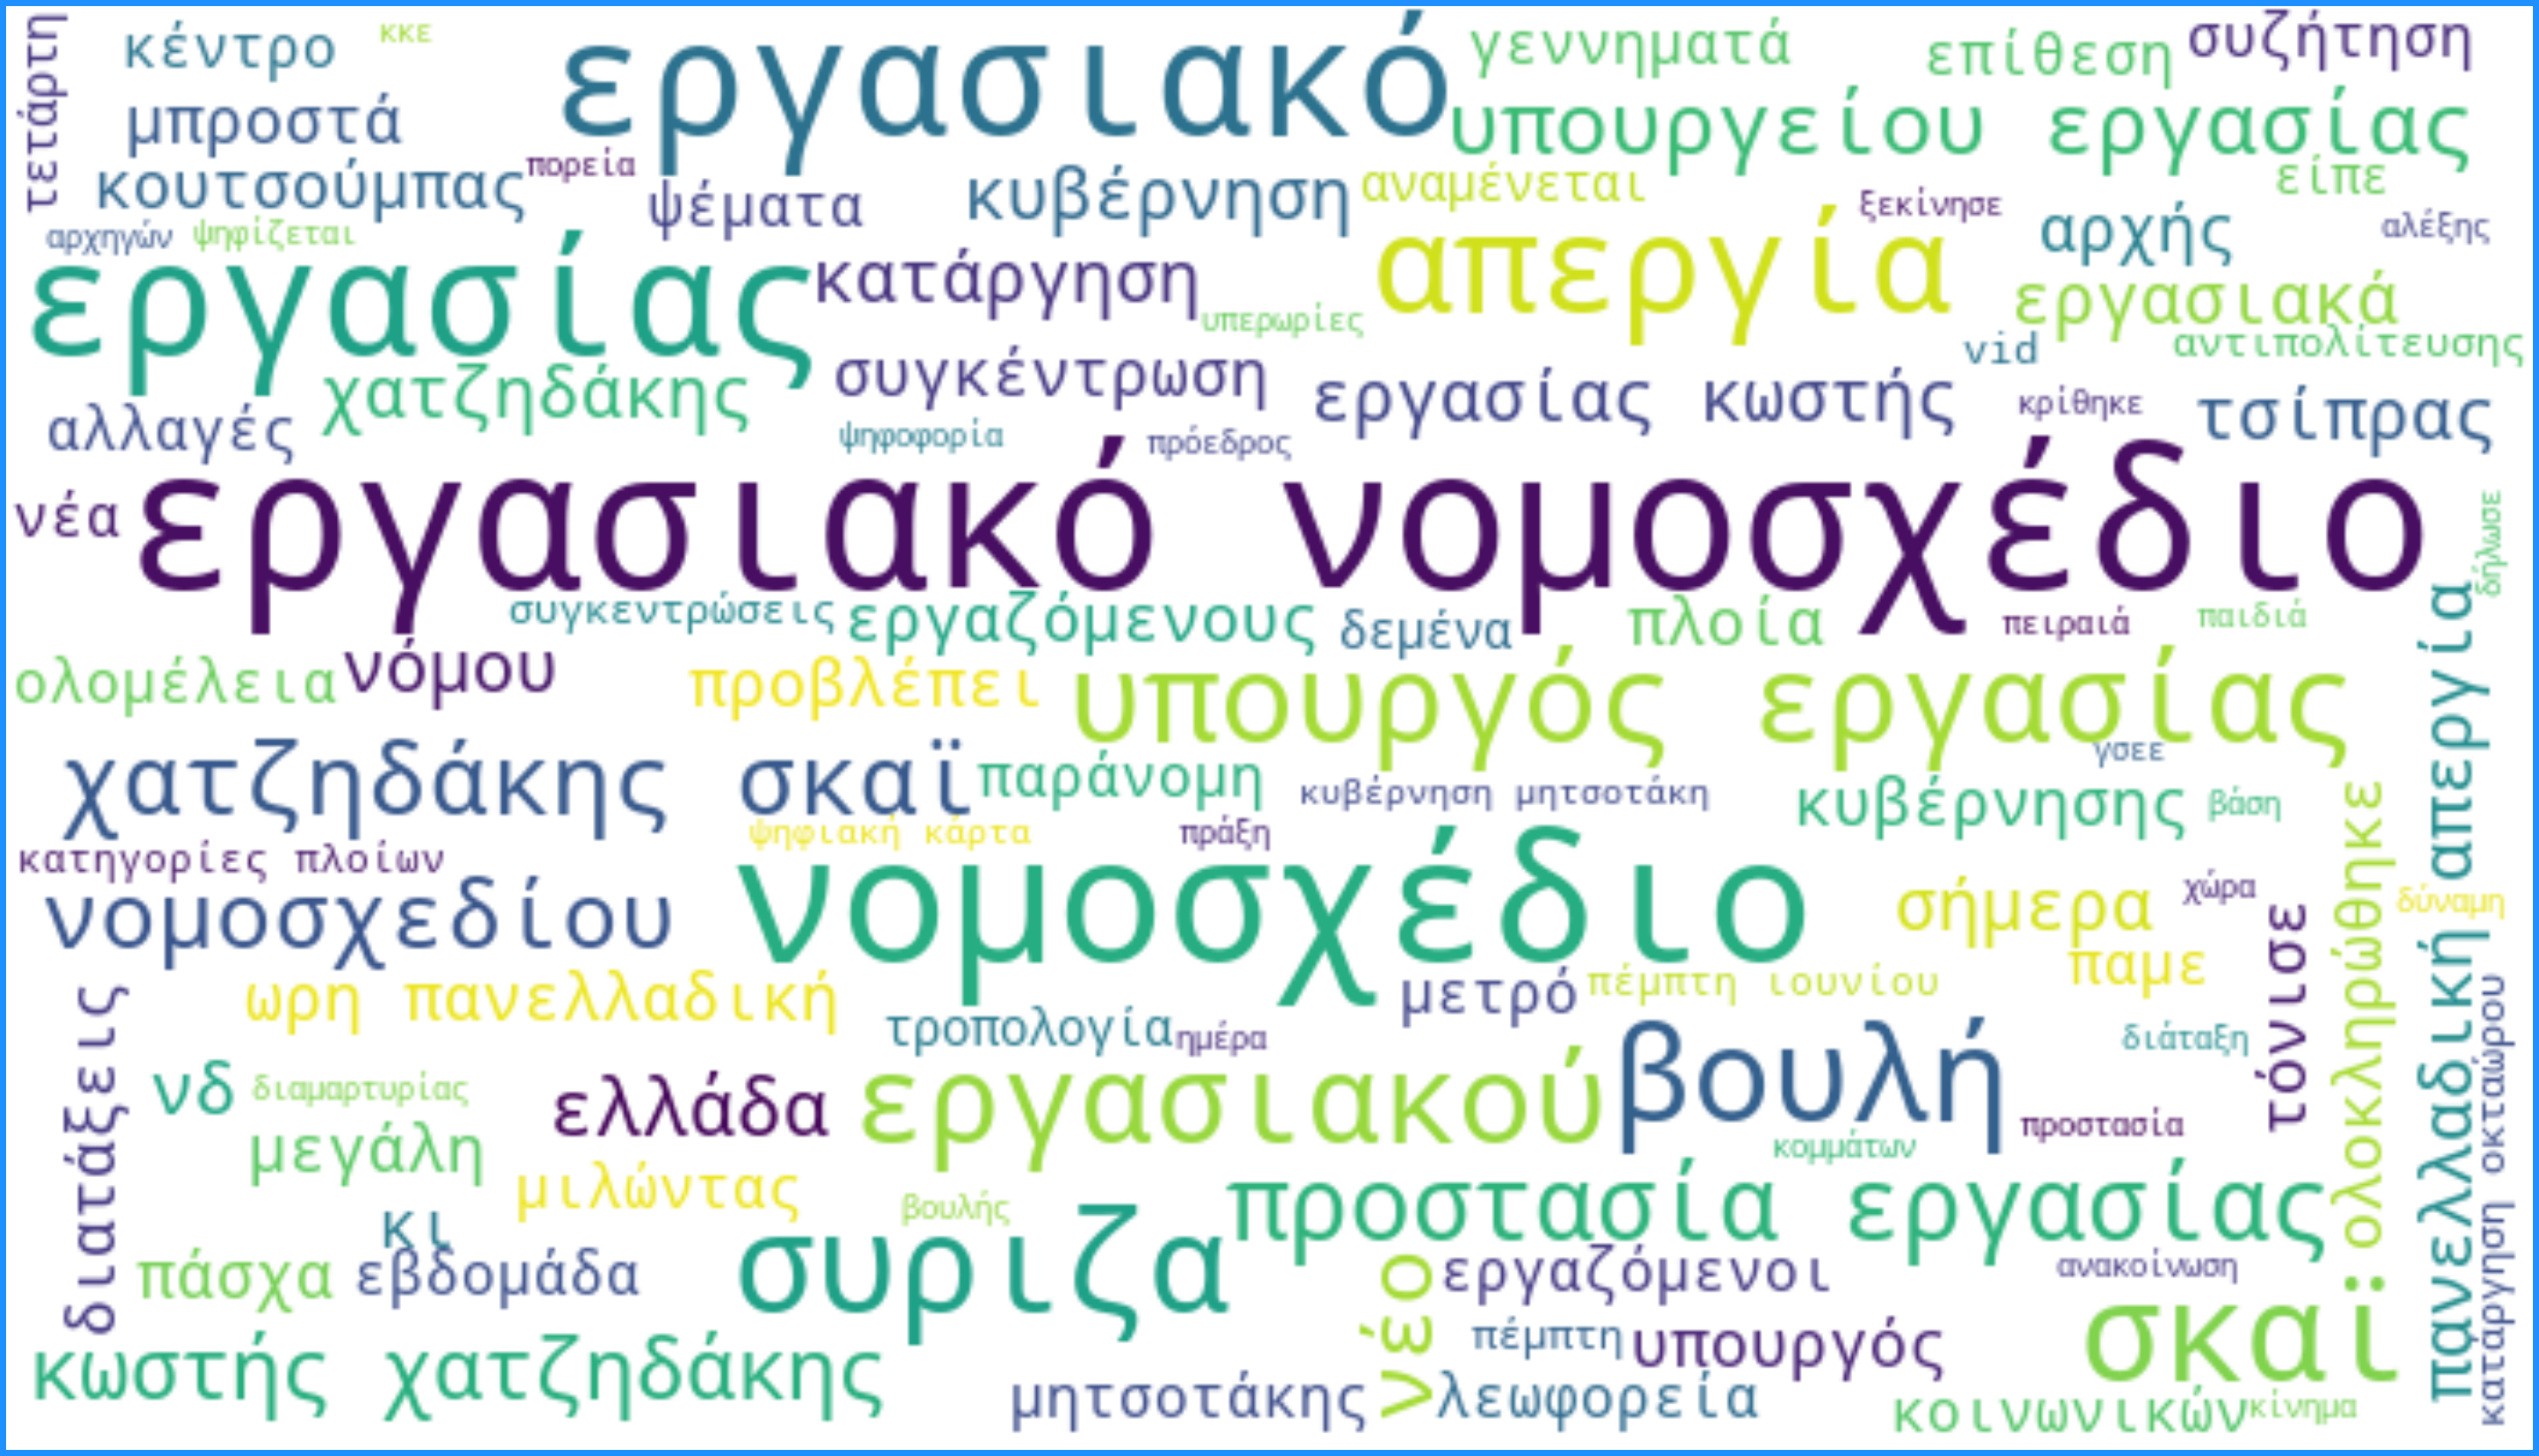

In [ ]:
#Wordcloud shows that words need lemmatization...
wordcloud = WordCloud(stopwords = NewStopWords, width = 700, height = 400, max_words = 100, background_color = 'white' ).generate(whole_text)

fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'dodgerblue',
    edgecolor = 'red')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

5) LEMMATIZATION: THE PROCESS OF RETURNING THE BASE OR DICTIONARY FORM OF A WORD (LEMMA)

In [ ]:
#print only the lemma for every word
full_text = nlp(whole_text)
for token in full_text:       
    print(token.lemma_)

η
κυβέρνηση
της
νέας
δημοκρατία
στη
μέση
της
θητεία
της
έχω
βάλω
τη
συντηρητικός
της
σφραγίδας
σε
όλους
τους
τομεί
της
κοινωνικός
και
οικονομικός
ζωή
μεγάλη
μεταρρύθμιση
που
δίνω
παραπάνω
δύναμη
στους
εργαζόμενου
και
παραπάνω
δύναμη
στην
οικονομία
χαρακτηρίζω
ο
υπουργός
εργασία
το
νόμο
για
την
προστασία
ήδη
από
την
επόμενη
εβδομάδα
θα
ισχύω
η
διάταξη
του
εργασιακός
νόμο
πως
αν
μια
απεργία
κριθώ
παράνομη
από
δικαστήριο
δεν
μπορώ
να
επαναπροκηρυχθώ
όπως
του
βασίλη
χιώτημιος
φορά
και
έναν
καιρό
υπήρχε
μια
χώρα
στην
οποία
δεν
γινάμαι
τίποτα
αν
δεν
το
θέλω
οι
συνδικαλιστέςγιο
να
προσλάβω
μια
ο
νόμος
πλέον
για
την
προστασία
της
εργασία
είναι
ένα
μεγάλος
βήμα
μπροστά
φέρνω
την
ελλάδα
πιο
κοντά
στις
προηγμένες
ευρωπαϊκός
χώρα
καθώς
ακολουθούμε
με
 
ναι
από
σύσσωμη
της
κοινοβουλευτικός
ομάδα
της
νδ
που
υπερασπίστηκε
τις
διατάξει
του
ως
προοδευτικός
φιλεργατικός
και
αναπτυξιακός
υπερψηφίστηκε
ολομέτωπη
αντιπαράθεση
με
την
κυβέρνηση
ώστε
να
ακυρωθώ
στην
πράξη
η
εφαρμογή
του
εργασιακός
νόμο
εξήγγε

In [ ]:
#print the actual word in the text and its lemma
new_text = ''
for token in full_text:               #token = λέξη , token.lema = λίμα/ρίζα λέξης
    print(token, "" , token.lemma_)
    new_text = new_text + '' + token.lemma_ 

η  η
κυβέρνηση  κυβέρνηση
της  της
νέας  νέας
δημοκρατίας  δημοκρατία
στη  στη
μέση  μέση
της  της
θητείας  θητεία
της  της
έχει  έχω
βάλει  βάλω
τη  τη
συντηρητική  συντηρητικός
της  της
σφραγίδα  σφραγίδας
σε  σε
όλους  όλους
τους  τους
τομείς  τομεί
της  της
κοινωνικής  κοινωνικός
και  και
οικονομικής  οικονομικός
ζωής  ζωή
μεγάλη  μεγάλη
μεταρρύθμιση  μεταρρύθμιση
που  που
δίνει  δίνω
παραπάνω  παραπάνω
δύναμη  δύναμη
στους  στους
εργαζόμενους  εργαζόμενου
και  και
παραπάνω  παραπάνω
δύναμη  δύναμη
στην  στην
οικονομία  οικονομία
χαρακτηρίζει  χαρακτηρίζω
ο  ο
υπουργός  υπουργός
εργασίας  εργασία
το  το
νόμο  νόμο
για  για
την  την
προστασία  προστασία
ήδη  ήδη
από  από
την  την
επόμενη  επόμενη
εβδομάδα  εβδομάδα
θα  θα
ισχύει  ισχύω
η  η
διάταξη  διάταξη
του  του
εργασιακού  εργασιακός
νόμου  νόμο
πως  πως
αν  αν
μια  μια
απεργία  απεργία
κριθεί  κριθώ
παράνομη  παράνομη
από  από
δικαστήριο  δικαστήριο
δεν  δεν
μπορεί  μπορώ
να  να
επαναπροκηρυχθεί  επαναπροκηρυχθώ
όπως  όπως
του

In [ ]:
#Modify the full text by replacing every word with its lemma.
final_text = ' '.join(token.lemma_ for token in full_text)
final_text[5:200]

'έρνηση της νέας δημοκρατία στη μέση της θητεία της έχω βάλω τη συντηρητικός της σφραγίδας σε όλους τους τομεί της κοινωνικός και οικονομικός ζωή μεγάλη μεταρρύθμιση που δίνω παραπάνω δύναμη στους'

In [ ]:
#Store the clear/lemmatized full text in a variable
full_doc = nlp(final_text)
full_doc

η κυβέρνηση της νέας δημοκρατία στη μέση της θητεία της έχω βάλω τη συντηρητικός της σφραγίδας σε όλους τους τομεί της κοινωνικός και οικονομικός ζωή μεγάλη μεταρρύθμιση που δίνω παραπάνω δύναμη στους εργαζόμενου και παραπάνω δύναμη στην οικονομία χαρακτηρίζω ο υπουργός εργασία το νόμο για την προστασία ήδη από την επόμενη εβδομάδα θα ισχύω η διάταξη του εργασιακός νόμο πως αν μια απεργία κριθώ παράνομη από δικαστήριο δεν μπορώ να επαναπροκηρυχθώ όπως του βασίλη χιώτημιος φορά και έναν καιρό υπήρχε μια χώρα στην οποία δεν γινάμαι τίποτα αν δεν το θέλω οι συνδικαλιστέςγιο να προσλάβω μια ο νόμος πλέον για την προστασία της εργασία είναι ένα μεγάλος βήμα μπροστά φέρνω την ελλάδα πιο κοντά στις προηγμένες ευρωπαϊκός χώρα καθώς ακολουθούμε με   ναι από σύσσωμη της κοινοβουλευτικός ομάδα της νδ που υπερασπίστηκε τις διατάξει του ως προοδευτικός φιλεργατικός και αναπτυξιακός υπερψηφίστηκε ολομέτωπη αντιπαράθεση με την κυβέρνηση ώστε να ακυρωθώ στην πράξη η εφαρμογή του εργασιακός νόμο εξήγγε

In [ ]:
clear_text = ' '.join(token.lemma_ for token in full_doc)
clear_text[50:200]


'α της έχω βάλω τη συντηρητικό της σφραγίδα σε όλους τους τομεί της κοινωνικός και οικονομικός ζωή μεγάλη μεταρρύθμιση που δίνω παραπάνω δύναμη στους ε'

In [ ]:
clear_text

'η κυβέρνηση της νέας δημοκρατία στη μέση της θητεία της έχω βάλω τη συντηρητικό της σφραγίδα σε όλους τους τομεί της κοινωνικός και οικονομικός ζωή μεγάλη μεταρρύθμιση που δίνω παραπάνω δύναμη στους εργαζόμενο και παραπάνω δύναμη στην οικονομία χαρακτηρίζω ο υπουργός εργασία το νόμο για την προστασία ήδη από την επόμενη εβδομάδα θα ισχύω η διάταξη του εργασιακός νόμο πως αν μια απεργία κριθώ παράνομη από δικαστήριο δεν μπορώ να επαναπροκηρυχθάω όπως του βασίλη χιώτημιος φορά και έναν καιρό υπήρχε μια χώρα στην οποία δεν γινάμαι τίποτα αν δεν το θέλω οι συνδικαλιστέςγιο να προσλάβω μια ο νόμος πλέον για την προστασία της εργασία είναι ένα μεγάλος βήμα μπροστά φέρνω την ελλάδα πιο κοντά στις προηγμένες ευρωπαϊκός χώρα καθώς ακολουθούμε με    ναι από σύσσωμη της κοινοβουλευτικός ομάδα της νδ που υπερασπίστηκε τις διατάξει του ως προοδευτικός φιλεργατικό και αναπτυξιακό υπερψηφίστηκε ολομέτωπη αντιπαράθεση με την κυβέρνηση ώστε να ακυρωθώ στην πράξη η εφαρμογή του εργασιακός νόμο εξήγγειλ

In [ ]:
NewStopWords.append('aud')
NewStopWords.append('audio')
NewStopWords.append('vid')
NewStopWords.append('vids')
NewStopWords.append('picsvid')
NewStopWords.append('σκαϊ')



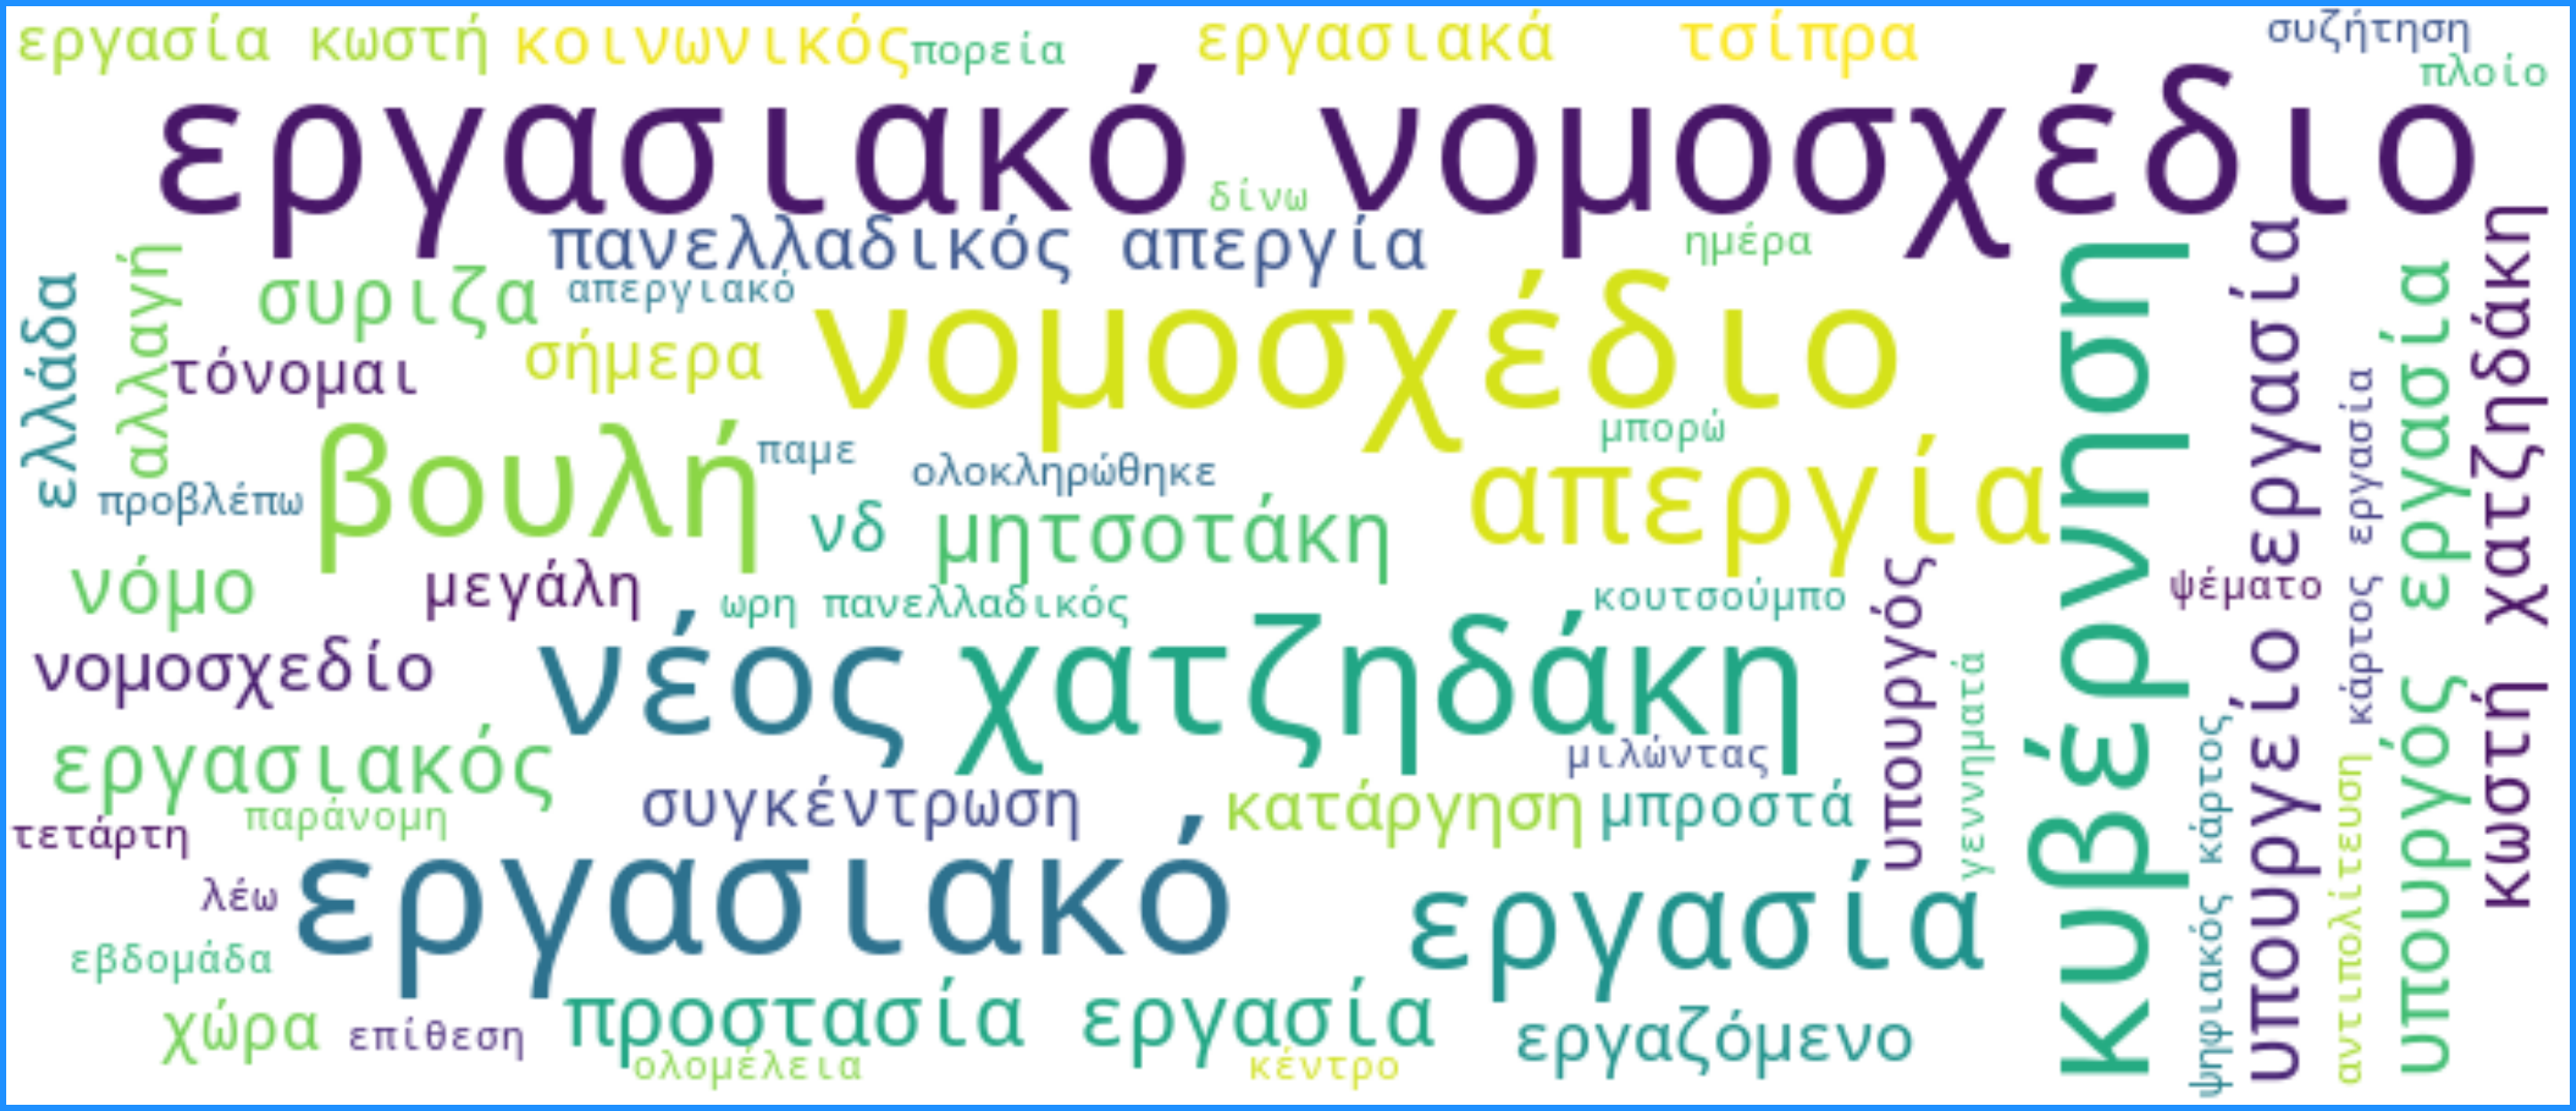

In [ ]:
wordcloud = WordCloud(stopwords = NewStopWords, width = 700, height = 300, max_words = 60, background_color = 'white').generate(clear_text)

fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'dodgerblue',
    edgecolor = 'green')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

6) VECTORIZATION : 

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer    #Vectorization
from html import unescape           #throw 'trash' words

In [ ]:
cv = CountVectorizer()

In [ ]:
#transform from text to vector
titles_vector = cv.fit_transform(df['Title'])

In [ ]:
summary_vector = cv.fit_transform(df['Summary'])

In [ ]:
titles_vector.shape


(90, 465)

In [ ]:
summary_vector.shape

In [ ]:
def my_tokenizer(full_text):
   # apply the preprocessing and tokenization steps
    text_clean = unescape(full_text).lower()  
    tokens = nlp(text_clean)  
    lemmatized_tokens = [token.lemma_ for token in tokens if (len(str(token.lemma_))>2)]

    # use CountVectorizer's _word_ngrams built in method
    # to remove stop words and extract n-grams
    return lemmatized_tokens


In [ ]:
cv = CountVectorizer(stop_words= NewStopWords, min_df=0.01, max_df=0.95,tokenizer= my_tokenizer) 
titles_vector = cv.fit_transform(df['Title']) 


/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['έγκαιρος', 'έκασ', 'έκασα', 'έκαστε', 'έξαφνος', 'έτερου', 'ίσιος', 'αδιάκοπας', 'αλλιώτικο', 'αλλοιώτικο', 'αφότο', 'βεβαιότατο', 'γρήγορας', 'δίχω', 'εαυτά', 'εκάστο', 'ετέρο', 'ετού', 'ευθύ', 'εχτά', 'ιδίο', 'κάνω', 'καθενό', 'κανενό', 'μέλλομαι', 'μεμιά', 'μερικού', 'μερικός', 'μπορώ', 'μόνε', 'ολωσδιόλο', 'ολόγυρας', 'ορισμένος', 'ορισμένω', 'ποί', 'ποιέ', 'ποιή', 'ποιώ', 'πολλός', 'προχθά', 'προχτέ', 'πόσα', 'πόσο', 'σει', 'στος', 'συχνά', 'ταύ', 'τόσε'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [ ]:
cv = CountVectorizer(stop_words= NewStopWords, min_df=0.01, max_df=0.95,tokenizer= my_tokenizer) 
summary_vector = cv.fit_transform(df['Summary']) 

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['έγκαιρος', 'έκαστας', 'έκαστε', 'έξαφνος', 'έτερου', 'ίσιος', 'αδιάκοπο', 'αλλιώτικας', 'αλλοιώτικο', 'αφότο', 'βεβαιότατο', 'γρήγορο', 'δίχω', 'δημοκρατία', 'εαυτής', 'εκάστα', 'εκάστο', 'ετέρο', 'ετούτε', 'ευθύ', 'εχτή', 'ηλιόπουλο', 'ιδίο', 'κάμποσε', 'καθενό', 'κανενό', 'λόγο', 'μέλλομαι', 'μεμιά', 'μερικού', 'μερικός', 'μπορώ', 'μόνε', 'ολωσδιόλο', 'ολόγυρο', 'ορισμένο', 'ορισμένος', 'ορισμένω', 'ποί', 'ποιώ', 'πολλός', 'προχθέ', 'προχτής', 'πόσε', 'πόσο', 'σει', 'στος', 'συχνά', 'ταύτε', 'ταύτο', 'τούτε', 'τσίπρο'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [ ]:
#create dataframe with vectorized titles
titles_results = pd.DataFrame(titles_vector.toarray(), columns=cv.get_feature_names()) 
titles_results

covid  eεφκα  fake  live  news  ...  ωραρίο  ωρη  ωρο  ωρος  ώρα
0   0      0      0     0     0     ...  0       0    0    0     0  
1   0      0      0     0     0     ...  0       0    1    0     0  
2   0      0      0     0     0     ...  0       0    0    0     0  
3   0      0      0     0     0     ...  0       0    0    0     0  
4   0      0      0     0     0     ...  0       0    0    0     0  
.. ..     ..     ..    ..    ..     ... ..      ..   ..   ..    ..  
85  0      0      0     0     0     ...  0       0    0    0     0  
86  0      0      0     0     0     ...  0       0    0    0     0  
87  0      0      0     0     0     ...  0       0    0    0     0  
88  0      0      0     0     0     ...  0       0    0    0     0  
89  0      0      0     0     0     ...  0       0    0    0     0  

[90 rows x 364 columns]

In [ ]:
summary_results = pd.DataFrame(titles_vector.toarray(), columns=cv.get_feature_names()) 
summary_results

sms  άρση  αλέξης  αλλαγή  ...  τσίπρας  τσαβούσογλο  χατζηδάκη  χώρα
0    0    0     0       0       ...  1        0            0          0   
1    0    0     0       0       ...  0        0            0          0   
2    0    0     0       0       ...  0        0            0          0   
3    0    0     0       0       ...  0        0            0          0   
4    0    0     0       0       ...  0        0            0          0   
..  ..   ..    ..      ..       ... ..       ..           ..         ..   
835  0    0     0       0       ...  0        0            0          0   
836  0    0     0       0       ...  0        0            0          0   
837  0    0     0       0       ...  0        0            0          0   
838  0    1     0       0       ...  0        0            0          0   
839  0    0     0       0       ...  0        0            0          0   

[840 rows x 45 columns]

In [ ]:
cv = CountVectorizer(stop_words= NewStopWords, analyzer='word', 
                     min_df=0.02, max_df=0.50, max_features=100, tokenizer=my_tokenizer)
titles_vector = cv.fit_transform(df['Title'])
titles_results = pd.DataFrame(titles_vector.toarray(), columns=cv.get_feature_names()) 

titles_results.head()

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['έγκαιρος', 'έκασ', 'έκασα', 'έκαστε', 'έξαφνος', 'έτερου', 'ίσιος', 'αδιάκοπας', 'αλλιώτικο', 'αλλοιώτικο', 'αφότο', 'βεβαιότατο', 'γρήγορας', 'δίχω', 'εαυτά', 'εκάστο', 'ετέρο', 'ετού', 'ευθύ', 'εχτά', 'ιδίο', 'κάνω', 'καθενό', 'κανενό', 'μέλλομαι', 'μεμιά', 'μερικού', 'μερικός', 'μπορώ', 'μόνε', 'ολωσδιόλο', 'ολόγυρας', 'ορισμένος', 'ορισμένω', 'ποί', 'ποιέ', 'ποιή', 'ποιώ', 'πολλός', 'προχθά', 'προχτέ', 'πόσα', 'πόσο', 'σει', 'στος', 'συχνά', 'ταύ', 'τόσε'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


fake  news  έκδοση  αλλαγή  αντιπολίτευση  ...  ψηφοφορία  ωραρίο  ωρη  ωρο  ώρα
0  0     0     0       0       0              ...  0          0       0    0    0  
1  0     0     0       0       0              ...  0          0       0    1    0  
2  0     0     0       0       0              ...  0          0       0    0    0  
3  0     0     0       0       0              ...  0          0       0    0    0  
4  0     0     0       0       0              ...  0          0       0    0    0  

[5 rows x 77 columns]

In [ ]:
cv = CountVectorizer( stop_words= NewStopWords , max_features=20, ngram_range=(2, 2)  , tokenizer=my_tokenizer)

titles_results.head()

fake  news  έκδοση  αλλαγή  αντιπολίτευση  ...  ψηφοφορία  ωραρίο  ωρη  ωρο  ώρα
0  0     0     0       0       0              ...  0          0       0    0    0  
1  0     0     0       0       0              ...  0          0       0    1    0  
2  0     0     0       0       0              ...  0          0       0    0    0  
3  0     0     0       0       0              ...  0          0       0    0    0  
4  0     0     0       0       0              ...  0          0       0    0    0  

[5 rows x 77 columns]

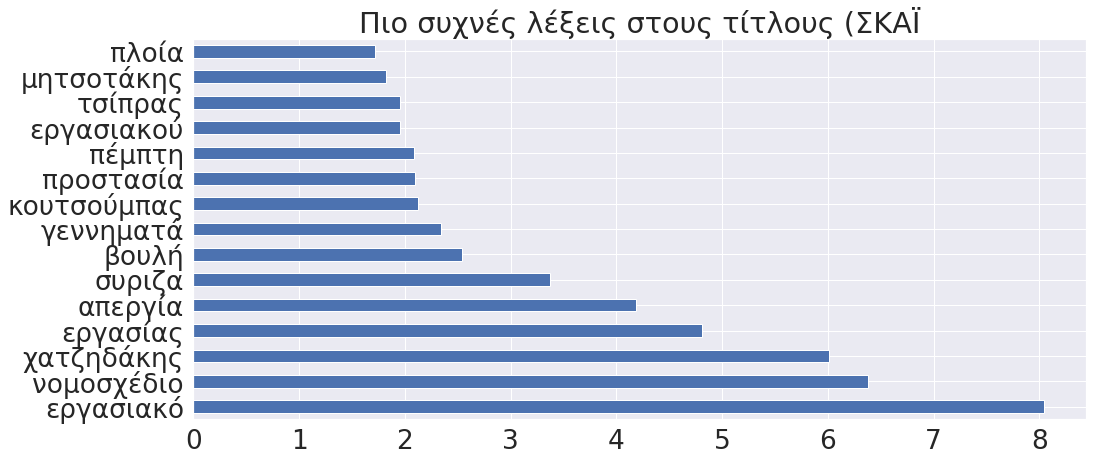

In [ ]:
#the most used words in news articles titles
sum_titles_words = titles_results.sum(axis =0)
sum_titles_words.sort_values(ascending= False).head(15).plot(kind='barh', color='b', grid= True, title= 'Πιο συχνές λέξεις στους τίτλους (ΣΚΑΪ',
                                                             figsize= (16,7)) 

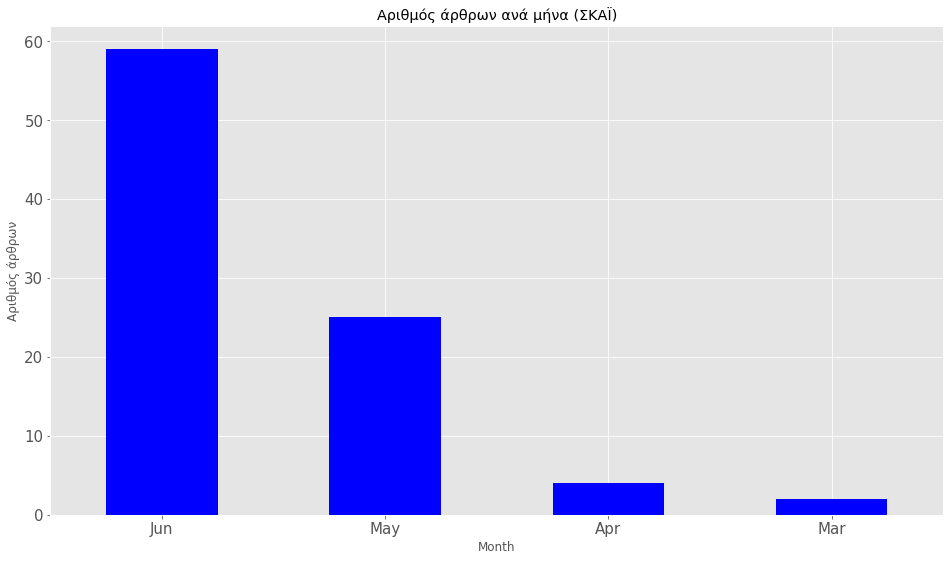

In [ ]:
#Plot number of articles per month
df['month'].value_counts(ascending= False).plot(kind= 'bar', xlabel= 'Month', ylabel= 'Αριθμός άρθρων', color='b', 
                                                title= 'Αριθμός άρθρων ανά μήνα (ΣΚΑΪ)', figsize= (16,9), fontsize= 15, rot= 0)

In [ ]:
cv = CountVectorizer( stop_words= NewStopWords, max_features=20, ngram_range=(2, 2), 
                     tokenizer=my_tokenizer, analyzer= 'word', min_df= 0.01, max_df= 0.90)
count_vector = cv.fit_transform(df['Title'])
work_words = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
work_words.head()

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['έγκαιρος', 'έκασ', 'έκασα', 'έκαστε', 'έξαφνος', 'έτερου', 'ίσιος', 'αδιάκοπας', 'αλλιώτικο', 'αλλοιώτικο', 'αφότο', 'βεβαιότατο', 'γρήγορας', 'δίχω', 'εαυτά', 'εκάστο', 'ετέρο', 'ετού', 'ευθύ', 'εχτά', 'ιδίο', 'κάνω', 'καθενό', 'κανενό', 'μέλλομαι', 'μεμιά', 'μερικού', 'μερικός', 'μπορώ', 'μόνε', 'ολωσδιόλο', 'ολόγυρας', 'ορισμένος', 'ορισμένω', 'ποί', 'ποιέ', 'ποιή', 'ποιώ', 'πολλός', 'προχθά', 'προχτέ', 'πόσα', 'πόσο', 'σει', 'στος', 'συχνά', 'ταύ', 'τόσε'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


fake news  απεργία τετάρτη  ...  ψηφιακός κάρτα  ωρη πανελλαδικός
0  0          0                ...  0               0               
1  0          0                ...  0               0               
2  0          0                ...  0               0               
3  0          0                ...  0               0               
4  0          0                ...  0               0               

[5 rows x 20 columns]

In [ ]:
sum_work_words = work_words.sum(axis =0)

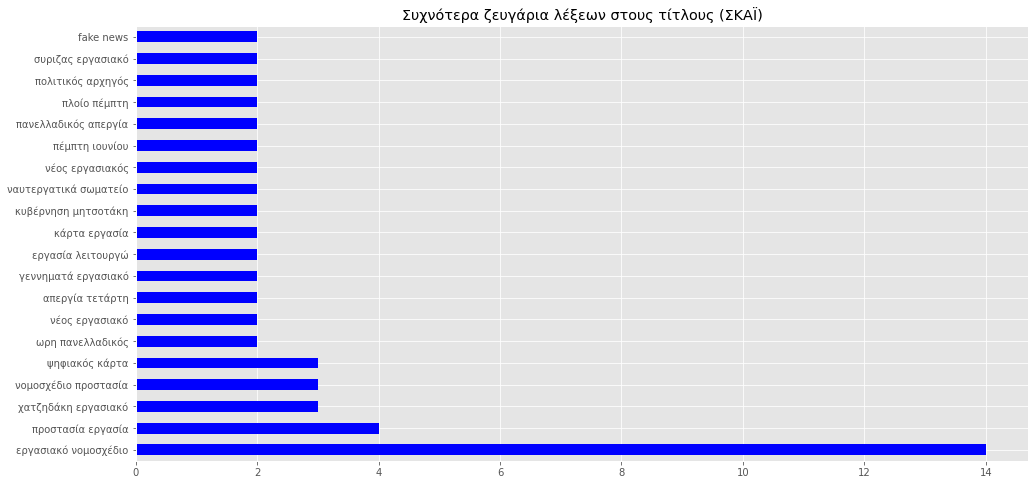

In [ ]:
sum_work_words.sort_values(ascending= False).plot(kind='barh', color='b', grid= True,
                                                  title= 'Συχνότερα ζευγάρια λέξεων στους τίτλους (ΣΚΑΪ)',
                                                  figsize= (16,8)) 

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf_vectorizer = TfidfVectorizer(stop_words= NewStopWords, max_features=150)
tfidf_matrix_train = tfidf_vectorizer.fit_transform(df['Title']) 


In [ ]:
titles_results = pd.DataFrame(tfidf_matrix_train.toarray(), columns=tfidf_vectorizer.get_feature_names()) 
titles_results.head()

fake  news  έκδοση  αλλαγές  ...  ωρη  ωρο      ωρου  ώρα
0  0.0   0.0   0.0     0.0      ...  0.0  0.0  0.000000  0.0
1  0.0   0.0   0.0     0.0      ...  0.0  0.0  0.415131  0.0
2  0.0   0.0   0.0     0.0      ...  0.0  0.0  0.000000  0.0
3  0.0   0.0   0.0     0.0      ...  0.0  0.0  0.000000  0.0
4  0.0   0.0   0.0     0.0      ...  0.0  0.0  0.000000  0.0

[5 rows x 150 columns]

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
print("cosine scores ==> ",cosine_similarity(tfidf_matrix_train[0:1], tfidf_matrix_train))

cosine scores ==>  [[1.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.3269112  0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.4491554  0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.36787192 0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.41687556
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.        ]]


In [ ]:
print("cosine scores ==> ",cosine_similarity(tfidf_matrix_train, tfidf_matrix_train))

cosine scores ==>  [[1.         0.         0.         ... 0.         0.         0.        ]
 [0.         1.         0.09959281 ... 0.         0.         0.1063799 ]
 [0.         0.09959281 1.         ... 0.         0.         0.15961909]
 ...
 [0.         0.         0.         ... 1.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.1063799  0.15961909 ... 0.         0.         1.        ]]


In [ ]:
arr = cosine_similarity(tfidf_matrix_train, tfidf_matrix_train)
df_similar = pd.DataFrame(arr)
df_similar.to_csv('/content/gdrive/My Drive/Colab Notebooks/similar_skai.csv' , index= False)
df_similar


0         1         2    3  ...        86        87   88        89
0   1.0  0.000000  0.000000  0.0  ...  0.000000  0.000000  0.0  0.000000
1   0.0  1.000000  0.099593  0.0  ...  0.078423  0.000000  0.0  0.106380
2   0.0  0.099593  1.000000  0.0  ...  0.000000  0.000000  0.0  0.159619
3   0.0  0.000000  0.000000  1.0  ...  0.000000  0.000000  0.0  0.000000
4   0.0  0.187297  0.000000  0.0  ...  0.000000  0.000000  0.0  0.000000
..  ...       ...       ...  ...  ...       ...       ...  ...       ...
85  0.0  0.000000  0.000000  0.0  ...  0.000000  0.493389  0.0  0.000000
86  0.0  0.078423  0.000000  0.0  ...  1.000000  0.000000  0.0  0.000000
87  0.0  0.000000  0.000000  0.0  ...  0.000000  1.000000  0.0  0.000000
88  0.0  0.000000  0.000000  0.0  ...  0.000000  0.000000  0.0  0.000000
89  0.0  0.106380  0.159619  0.0  ...  0.000000  0.000000  0.0  1.000000

[90 rows x 90 columns]